<a href="https://colab.research.google.com/github/denisebock/osteoporotic-fractures/blob/main/1_DatasetCharacteristics/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

Source: https://sofonline.ucsf.edu/


In [ ]:
# mount google drive if needed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df_wide = pd.read_csv('/content/drive/MyDrive/OPENCAMP_OSTEO_PROJECT/SOF_Data_wide.csv', sep ='\t')

print(df_wide.head())

   Unnamed: 0      V1BMI  V1WGHT  V1HGHT   ID  V2WGHT  V2HGHT      V2BMI  \
0           0  28.671137    65.2  150.80  1.0    67.3   150.5  29.712696   
1           1  28.235766    63.7  150.20  2.0    68.4   151.8  29.683326   
2           2  30.700408    70.0  151.00  3.0    72.7   151.0  31.884566   
3           3  25.205854    62.9  157.97  4.0    60.6   155.1  25.191210   
4           4  17.616528    43.7  157.50  5.0    44.7   157.0  18.134610   

   V3WGHT  V3HGHT  ...  V8PFX9  V8PFX10  V8PFX11  V8PFX12  V8PFX13  V8PFX14  \
0    65.9   151.3  ...     0.0      0.0      0.0      0.0      0.0      0.0   
1    68.2   150.8  ...     NaN      NaN      NaN      NaN      NaN      NaN   
2    73.2   150.6  ...     0.0      0.0      0.0      0.0      0.0      0.0   
3    61.6   154.3  ...     NaN      NaN      NaN      NaN      NaN      NaN   
4    45.0   157.3  ...     NaN      NaN      NaN      NaN      NaN      NaN   

   V8NPFX  V8PFX  V8PFXDY  Race  
0     0.0    0.0   5201.0     0  


In [ ]:
list(df_wide.columns)

['Unnamed: 0',
 'V1BMI',
 'V1WGHT',
 'V1HGHT',
 'ID',
 'V2WGHT',
 'V2HGHT',
 'V2BMI',
 'V3WGHT',
 'V3HGHT',
 'V3BMI',
 'V5WGHT',
 'V5HGHT',
 'V5BMI',
 'V4WGHT',
 'V4HGHT',
 'V4BMI',
 'V6WGHT',
 'V6HGHT',
 'V6BMI',
 'V7WGHT',
 'V7HGHT',
 'V7BMI',
 'V8WGHT',
 'V8HGHT',
 'V8BMI',
 'V9WGHT',
 'V9HGHT',
 'V9BMI',
 'V1SHT3MS',
 'V5SHT3MS',
 'V8SHT3MS',
 'V4SHT3MS',
 'V6SHT3MS',
 'V4AGE',
 'V5AGE',
 'V3AGE',
 'V2AGE',
 'V1AGE',
 'V9SHT3MS',
 'V6AGE',
 'V8AGE',
 'V9AGE',
 'V7AGE',
 'V5TIBMID',
 'V1HYSAGE',
 'V1OVAGE',
 'V1OVAGE2',
 'V1CAGE',
 'V1MAGE',
 'V1SAGE',
 'V6MAGE',
 'V4DOCF',
 'V4VERT',
 'V4FALL',
 'V4NFALL',
 'V1DOCF',
 'V1VERT',
 'V1FALL',
 'V1NFALL',
 'V1HIP50',
 'V1SISHIP',
 'V1DADHIP',
 'V1MHIP50',
 'V3DOCF',
 'V3FALL',
 'V3NFALL',
 'V3VERT',
 'V5FALL',
 'V5NFALL',
 'V5DOCF',
 'V5VERT',
 'V2DOCF',
 'V2FALL',
 'V2NFALL',
 'V2VERT',
 'V2BROHIP',
 'V6FALL',
 'V6NFALL',
 'V6DOCF',
 'V6VERT',
 'V8DOCF',
 'V8VERT',
 'V8FALL',
 'V8NFALL',
 'V9DOCF',
 'V9FALL',
 'V9NFALL',
 'V7FALL',
 'V

In [ ]:
#subdataset for V1
v1df_wide = df_wide.filter(like='V1')

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(v1df_wide.head())


Example data:
       V1BMI  V1WGHT  V1HGHT  V1SHT3MS  V1AGE  V1HYSAGE  V1OVAGE  V1OVAGE2  \
0  28.671137    65.2  150.80      25.0   67.0      65.0     65.0       NaN   
1  28.235766    63.7  150.20      24.0   82.0       NaN      NaN       NaN   
2  30.700408    70.0  151.00      26.0   73.0       NaN      NaN       NaN   
3  25.205854    62.9  157.97      26.0   65.0      45.0      NaN       NaN   
4  17.616528    43.7  157.50      23.0   82.0       NaN      NaN       NaN   

   V1CAGE  V1MAGE  ...  V1PFX8  V1PFX9  V1PFX10  V1PFX11  V1PFX12  V1PFX13  \
0     NaN     NaN  ...     0.0     0.0      0.0      0.0      0.0      0.0   
1     1.0     NaN  ...     NaN     NaN      NaN      NaN      NaN      NaN   
2     NaN     NaN  ...     0.0     0.0      0.0      0.0      0.0      0.0   
3     2.0     NaN  ...     NaN     NaN      NaN      NaN      NaN      NaN   
4     NaN     NaN  ...     NaN     NaN      NaN      NaN      NaN      NaN   

   V1PFX14  V1PFXDY  V1HIPI  V1TSTAGE  
0      0

In [ ]:
#filter var with multiple versions: AGE, THD, PFX, FALL
#spec_var = ['V1AGE', 'V1THD', 'V1PFX', 'V1FALL']
#df_filt = v1df_wide

#filt_spec_var = df_filt.filter(like=spec_var)
#print(filt_spec_var)

#remove var with multiple versions: AGE, THD, PFX, FALL
list(v1df_wide.columns)

['V1BMI',
 'V1WGHT',
 'V1HGHT',
 'V1SHT3MS',
 'V1AGE',
 'V1HYSAGE',
 'V1OVAGE',
 'V1OVAGE2',
 'V1CAGE',
 'V1MAGE',
 'V1SAGE',
 'V1DOCF',
 'V1VERT',
 'V1FALL',
 'V1NFALL',
 'V1HIP50',
 'V1SISHIP',
 'V1DADHIP',
 'V1MHIP50',
 'V1AVDRWK',
 'V1DRAGE',
 'V1SMOKE',
 'V1SMKAGE',
 'V1COFAGE',
 'V1TEAAGE',
 'V1COKAGE',
 'V1GTAGE',
 'V1EDAGE',
 'V1HYAGE',
 'V1OSAGE',
 'V1ESTRK',
 'V1EPARK',
 'V1EARTH',
 'V1EAAGE',
 'V1HYTEN',
 'V1EDIAB',
 'V1THYUSE',
 'V1OESUSE',
 'V1ANTDEP',
 'V1THIUSE',
 'V1CHRTM',
 'V1STPLGT',
 'V1WLKSPD',
 'V1AC2040',
 'V1CSNORM',
 'V1DIZZY',
 'V1PSTHY2',
 'V1PFX',
 'V1NPFX',
 'V1PFX2',
 'V1PFX3',
 'V1PFX4',
 'V1PFX5',
 'V1PFX6',
 'V1PFX7',
 'V1PFX8',
 'V1PFX9',
 'V1PFX10',
 'V1PFX11',
 'V1PFX12',
 'V1PFX13',
 'V1PFX14',
 'V1PFXDY',
 'V1HIPI',
 'V1TSTAGE']

In [ ]:
#remove var with multiple versions: AGE, THD, PFX, FALL
v1df_wide.drop(['V1HYSAGE','V1OVAGE','V1OVAGE2','V1CAGE','V1MAGE','V1SAGE',
                'V1TSTAGE', 'V1SMKAGE', 'V1COFAGE', 'V1TEAAGE', 'V1COKAGE',
                'V1DRAGE', 'V1EAAGE', 'V1GTAGE', 'V1EDAGE', 'V1HYAGE',
                'V1OSAGE', 'V1NPFX','V1PFX2','V1PFX3','V1PFX4','V1PFX5',
                'V1PFX6','V1PFX7','V1PFX8','V1PFX9','V1PFX10','V1PFX11',
                'V1PFX12','V1PFX13','V1PFX14','V1PFXDY', 'V1NFALL'],
               axis=1, inplace=True)

<ipython-input-7-23b383b4e1bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1df_wide.drop(['V1HYSAGE','V1OVAGE','V1OVAGE2','V1CAGE','V1MAGE','V1SAGE',


In [ ]:
# Number of samples
num_samples = v1df_wide.shape[0]

# Number of features
num_features = v1df_wide.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 9704
Number of features: 32


## Handling Missing Values

1. Variables with more than 1000 values were deleted --> 3 variables
2. Median imputation

In [ ]:
# Check for missing values
missing_values = v1df_wide.isnull().sum()
missing_values

V1BMI         61
V1WGHT       163
V1HGHT       110
V1SHT3MS      53
V1AGE         31
V1DOCF        34
V1VERT        99
V1FALL        18
V1HIP50       35
V1SISHIP    2978
V1DADHIP    3589
V1MHIP50    2323
V1AVDRWK       0
V1SMOKE       31
V1ESTRK       57
V1EPARK       11
V1EARTH      182
V1HYTEN        3
V1EDIAB       25
V1THYUSE      87
V1OESUSE     136
V1ANTDEP      55
V1THIUSE      94
V1CHRTM       73
V1STPLGT       7
V1WLKSPD       8
V1AC2040       0
V1CSNORM       0
V1DIZZY       24
V1PSTHY2       9
V1PFX        129
V1HIPI        38
dtype: int64

In [ ]:
#Note: Features with >1000 missing values will be deleted
#In this case: V1SISHIP = 2978 / V1DADHIP = 3589 / V1MHIP50 = 2323
v1df_wide.drop(['V1SISHIP', 'V1DADHIP', 'V1MHIP50'], axis=1, inplace=True)

In [ ]:
#check
# Check for missing values
missing_values = v1df_wide.isnull().sum()
missing_values

  #we have 27 columns

V1BMI        61
V1WGHT      163
V1HGHT      110
V1SHT3MS     53
V1AGE        31
V1DOCF       34
V1VERT       99
V1FALL       18
V1HIP50      35
V1AVDRWK      0
V1SMOKE      31
V1ESTRK      57
V1EPARK      11
V1EARTH     182
V1HYTEN       3
V1EDIAB      25
V1THYUSE     87
V1OESUSE    136
V1ANTDEP     55
V1THIUSE     94
V1CHRTM      73
V1STPLGT      7
V1WLKSPD      8
V1AC2040      0
V1CSNORM      0
V1DIZZY      24
V1PSTHY2      9
V1PFX       129
V1HIPI       38
dtype: int64

In [ ]:
v1df_wide['V1ESTRK'].unique()

array([ 0.,  1., nan])

In [ ]:
#separate continuous, discrete, categorical variables
cont_var = ['V1BMI', 'V1WGHT', 'V1HGHT', 'V1AVDRWK','V1CHRTM','V1STPLGT',
            'V1WLKSPD','V1CSNORM']
dis_var = ['V1AGE', 'V1SHT3MS', 'V1THYUSE', 'V1OESUSE', 'V1THIUSE'] #remove age?
cat_var = ['V1DOCF', 'V1VERT', 'V1FALL', 'V1HIP50', 'V1SMOKE', 'V1ESTRK',
               'V1EPARK', 'V1EARTH', 'V1HYTEN', 'V1EDIAB', 'V1ANTDEP',
               'V1AC2040', 'V1DIZZY', 'V1PSTHY2', 'V1PFX']
  #cat_multi_var = v1df_wide['V1SHT3MS', 'V1THYUSE']

In [ ]:
# Handling missing values #1

  # fill missing values for continuous var
  # rule: fill with median value
for column in cont_var:
  v1df_wide[column].fillna(v1df_wide[column].median(), inplace=True)

  # fill missing values for discrete var
  # rule: fill with median value rounded to nearest whole number
for column in dis_var:
  v1df_wide[column].fillna(v1df_wide[column].median().round().astype(int), inplace=True)

  # fill missing values for categorical var
  # rule: if median < 0.5, fill w/ 0, > 0.5 fill w/ 1, = 0.5, randomly fill w/ 0 or 1
for column in cat_var:
    median_value = v1df_wide[column].median()

    # check conditions and fill NaN values accordingly
    if median_value < 0.5:
        v1df_wide[column].fillna(0, inplace=True)
    elif median_value > 0.5:
      v1df_wide[column].fillna(1, inplace=True)
    else:
        # randomly fill NaN with 0 or 1
        v1df_wide[column].fillna(np.random.choice([0, 1]), inplace=True)


In [ ]:
# check dataframe

print("DataFrame after filling NaN values:")
print(v1df_wide)

DataFrame after filling NaN values:
          V1BMI  V1WGHT  V1HGHT  V1SHT3MS  V1AGE  V1DOCF  V1VERT  V1FALL  \
0     28.671137    65.2  150.80      25.0   67.0     1.0     0.0     0.0   
1     28.235766    63.7  150.20      24.0   82.0     1.0     1.0     0.0   
2     30.700408    70.0  151.00      26.0   73.0     0.0     0.0     0.0   
3     25.205854    62.9  157.97      26.0   65.0     0.0     0.0     0.0   
4     17.616528    43.7  157.50      23.0   82.0     0.0     0.0     0.0   
...         ...     ...     ...       ...    ...     ...     ...     ...   
9699  30.026062    72.8  155.71      24.0   72.0     1.0     0.0     1.0   
9700  24.375499    63.9  161.91      23.0   75.0     1.0     0.0     0.0   
9701  30.110043    68.2  150.50      24.0   66.0     1.0     0.0     0.0   
9702  22.321391    52.8  153.80      25.0   74.0     0.0     0.0     1.0   
9703  23.230913    56.6  156.09      22.0   77.0     1.0     0.0     0.0   

      V1HIP50  V1AVDRWK  ...  V1THIUSE  V1CHRTM  V1

In [ ]:
# check that there are no missing values
missing_values = v1df_wide.isnull().sum()
missing_values

V1BMI        0
V1WGHT       0
V1HGHT       0
V1SHT3MS     0
V1AGE        0
V1DOCF       0
V1VERT       0
V1FALL       0
V1HIP50      0
V1AVDRWK     0
V1SMOKE      0
V1ESTRK      0
V1EPARK      0
V1EARTH      0
V1HYTEN      0
V1EDIAB      0
V1THYUSE     0
V1OESUSE     0
V1ANTDEP     0
V1THIUSE     0
V1CHRTM      0
V1STPLGT     0
V1WLKSPD     0
V1AC2040     0
V1CSNORM     0
V1DIZZY      0
V1PSTHY2     0
V1PFX        0
V1HIPI      38
dtype: int64

In [ ]:
#drop missing values for HIPI - target variable
drop_column = 'V1HIPI'
v1df_wide = v1df_wide.dropna(subset=[drop_column])

#confirm result
missing_values = v1df_wide.isnull().sum()
missing_values

V1BMI       0
V1WGHT      0
V1HGHT      0
V1SHT3MS    0
V1AGE       0
V1DOCF      0
V1VERT      0
V1FALL      0
V1HIP50     0
V1AVDRWK    0
V1SMOKE     0
V1ESTRK     0
V1EPARK     0
V1EARTH     0
V1HYTEN     0
V1EDIAB     0
V1THYUSE    0
V1OESUSE    0
V1ANTDEP    0
V1THIUSE    0
V1CHRTM     0
V1STPLGT    0
V1WLKSPD    0
V1AC2040    0
V1CSNORM    0
V1DIZZY     0
V1PSTHY2    0
V1PFX       0
V1HIPI      0
dtype: int64

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


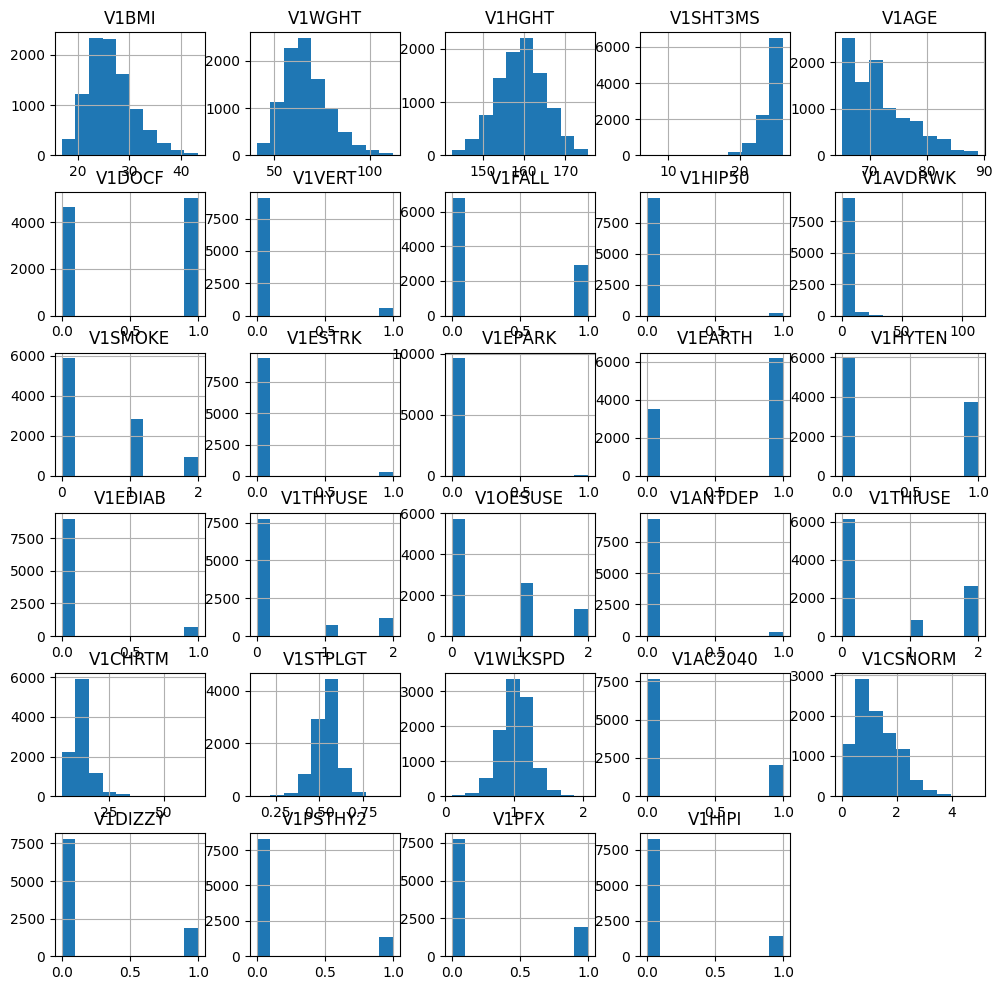

In [ ]:
# Example: Plotting histograms of all numerical features
v1df_wide.hist(figsize=(12, 12))
plt.show()

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


<Axes: xlabel='V1HIPI', ylabel='count'>

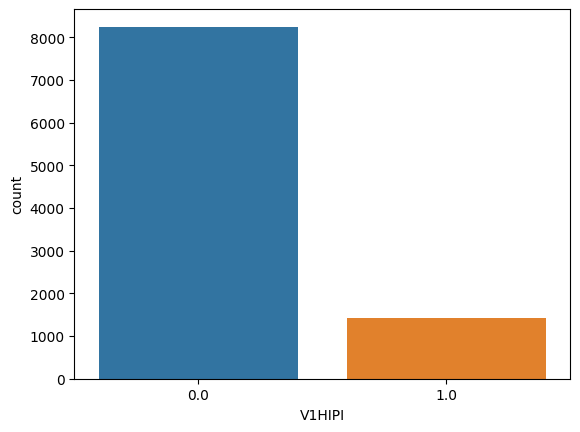

In [ ]:
# Example: Checking for class imbalance in a classification problem
sns.countplot(x='V1HIPI', data=v1df_wide)

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


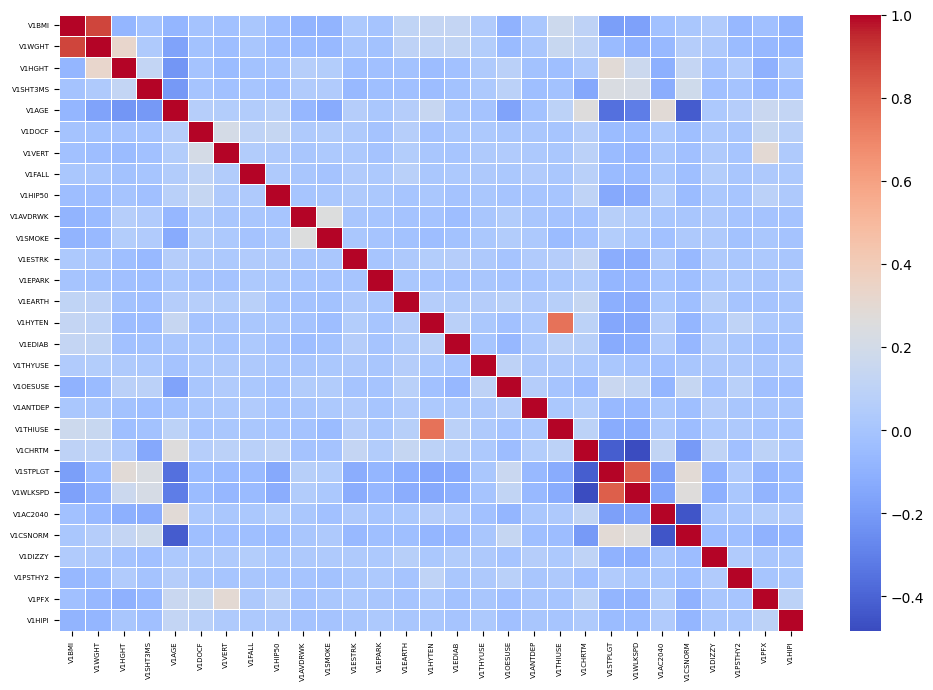

In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = v1df_wide.corr()

# Increase the size of the figure
plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            fmt=".2f", linewidths=.5)

# Adjust the size of x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=5)

plt.show()


In [ ]:
# remove redundant variables
v1df_wide.drop(['V1WGHT'], axis=1, inplace=True)

In [ ]:
# Number of samples
num_samples_clean = v1df_wide.shape[0]

# Number of features
num_features_clean = v1df_wide.shape[1]

# Display these dataset characteristics
print(f"Number of final participants: {num_samples_clean}")
print(f"Number of final variables (features): {num_features_clean}")

Number of final participants: 9666
Number of final variables (features): 29


## Save Dataset

In [ ]:
v1df_wide.to_csv('/content/drive/MyDrive/OPENCAMP_OSTEO_PROJECT/v1df_wide.csv', sep ='\t')